In [1]:
import numpy as np
import sys
sys.path.append('/pscratch/sd/m/mpatil1/MEA_Analysis/IPNAnalysis/')  # Add parent directory to path for module imports


In [2]:
import helper_functions

In [3]:
spiketimes = np.load("/pscratch/sd/m/mpatil1/MEA_Analysis/AnalyzedData/V1_PYTHON/CDKL5_T1/240531/M07420/Network/000052/well002/spike_times.npy", allow_pickle=True).item()

In [4]:
import json

with open("/pscratch/sd/m/mpatil1/MEA_Analysis/AnalyzedData/V1_PYTHON/CDKL5_T1/240531/M07420/Network/000052/well002/network_results.json", "r") as f:
    network_data = json.load(f)



Figure saved to /pscratch/sd/m/mpatil1/MEA_Analysis/IPNAnalysis/figures/figure_raster_network_pub_M07420_well3_div16.svg


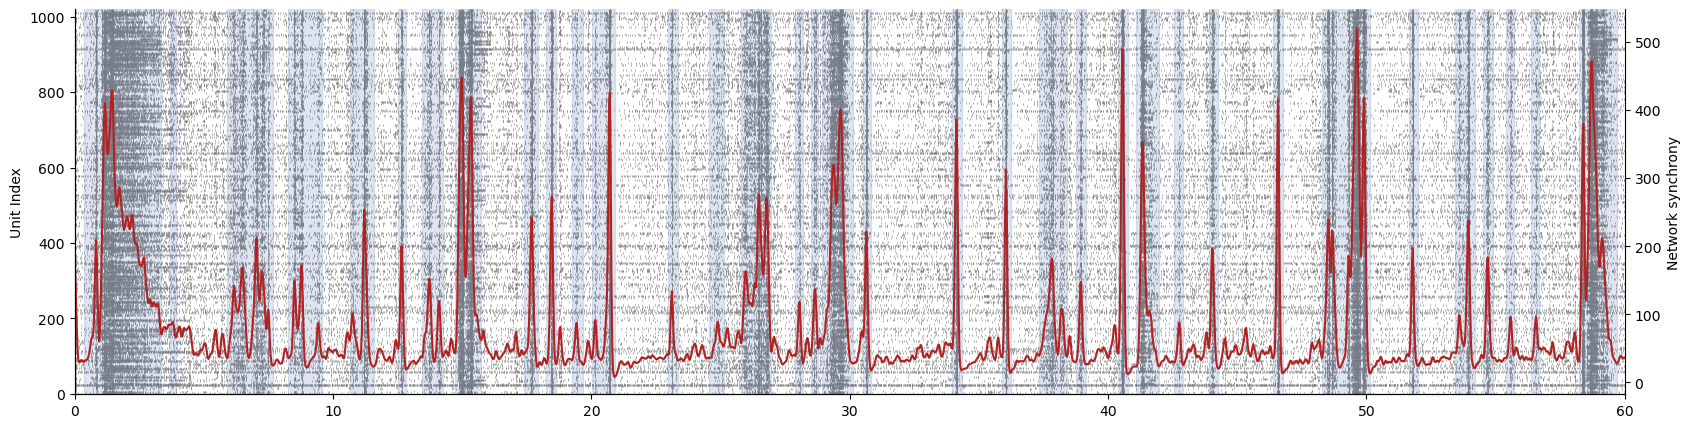

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))
ax_raster = ax
ax_network = ax.twinx()
# Raster (left axis)
helper_functions.plot_clean_raster(
    ax_raster,
    spiketimes,
    color='gray',
    markersize=2,
    markeredgewidth=0.5,
    alpha=0.9
)

# Network (right axis)
helper_functions.plot_clean_network(
    ax_network,
   
    network_data["plot_data"]["t"],
    network_data["plot_data"]["signal"],
    color="#B22222"

)
ax.spines["right"].set_visible(True)
ax.set_xlim(0, 60)

nb_events = network_data["network_bursts"]["events"]
burst_intervals = [
    (ev["start"], ev["end"]) for ev in nb_events
]
for start, end in burst_intervals:
    ax_network.axvspan(start, end, color='#4C72B0', alpha=0.18)
save_path = "/pscratch/sd/m/mpatil1/MEA_Analysis/IPNAnalysis/figures/figure_raster_network_pub_M07420_well3_div16.svg"
dir = "/pscratch/sd/m/mpatil1/MEA_Analysis/IPNAnalysis/figures/"
import os
if not os.path.exists(dir):
    os.makedirs(dir)
fig.savefig(save_path, dpi=300, bbox_inches='tight', format='svg')
print(f"Figure saved to {save_path}")